## Optimization per Stadsdeel
The aim of this Notebook is to explore the possibiliy to optimize certain subsets of the problem and to reassamble these results to see whether or not this actually helps in obtaining a valid, improved solution. 

### Current situation
The process starts with the normal loading of the data, followed by a calculation of the average distance and penalties as a way to set a baseline. 

In [1]:
import requests
import pandas as pd
import geopandas as gpd

import sys

sys.path.append("../")

from Code.helper_functions import initial_loading, analyze_candidate_solution
from Code.algorithms import random_start_hillclimber
from Code.loading_data import create_all_households

POSTGRES password?WelkomCorne!


In [2]:
all_households, rel_poi_df, joined, df_afstandn2 = initial_loading()

Do you want to use addresses instead of clusters?True
What stadsdeel do you want to make as a subsection (optional parameter)?
API data loaded
DB relation POIs loaded
Table all households created
API and DB joined
containers per cluster determined


..\Code\loading_data.py:239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verblijfsobjecten['bag'] = verblijfsobjecten['split'].apply(lambda x: x[3]).astype('int64')


distance matrix loaded


In [3]:
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

Average distance is : 175.2455230515281
Penalties are: 295.1202834747615


### Modification
This step consists of remvoving all information regarding the configuration of the containers in a certain stadsdeel, optimizing a copy of this and resetting it back into the initial solution to see its impact. The first optimization is done in stadsdeel Zuidoost (T), as it contains the least amount of garbage clusters

In [ ]:
joined_T = joined[joined['stadsdeel'] == 'T']

In [ ]:
all_households_T  = create_all_households(rel_poi_df, subsectie='T')
all_households_T = all_households_T.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

In [ ]:
hillclimber_df_T, best_solution_T = random_start_hillclimber(joined_T, all_households_T, rel_poi_df, df_afstandn2)

In [ ]:
# Join improved solution back with the rest and calculate score
joined_new = joined[joined['stadsdeel'] != 'T']
joined_new = joined_new.append(best_solution, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined_new, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

### Conclusion
This system of isolating certain stadsdelen appears to be working just fine and can be applied further to be used for multiple (clusters of) stadsdelen. The obvious places for optimization include Zuidoost (T), Noord (N), Nieuw-West(F) and the remaining cluster of Oost (M), Zuidoost(T), West(E) and Centrum(A). This is applied next

### Optimization of Zuid-Oost (T)

In [11]:
joined_T = joined[joined['stadsdeel'] == 'T']
all_households_T  = create_all_households(rel_poi_df, subsectie='T')
all_households_T = all_households_T.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

In [ ]:
hillclimber_df_T, best_solution_T = random_start_hillclimber(joined_T, all_households_T, rel_poi_df, df_afstandn2)

How many random iterations?100
How many iterations hillclimber?5000
Do you want the results saved(True/False)?True
Do you want to only use a subset of data?True
Do you want to use addresses instead of clusters?True
What parameter to optimize on (score/penalties)?penalties
What method hillclimber(2-opt or Gaussian)?Gaussian
Average distance is : 249.6004611676881
Penalties are: 308.1859662117452
Average distance is : 248.58986072868302
Penalties are: 324.03315277834906
Average distance is : 248.24613560639435
Penalties are: 317.60948062685094
Average distance is : 259.65708733140605
Penalties are: 331.5412084687204
Average distance is : 253.78210525821714
Penalties are: 320.5298966886055
Average distance is : 251.0088087455015
Penalties are: 313.72705879328777
Average distance is : 257.87581836872755
Penalties are: 328.0021980957473
Average distance is : 257.52693890510665
Penalties are: 320.0460892563343
Average distance is : 251.728195645587
Penalties are: 322.6625204408982
Average di

Average distance is : 249.46911919720245
Penalties are: 310.77831947890814
310.77831947890814 308.1859662117452
21
Amount of clusters to change: 20
Average distance is : 250.41277788800892
Penalties are: 309.3911941332121
309.3911941332121 308.1859662117452
19
Amount of clusters to change: 14
Average distance is : 249.86113750682378
Penalties are: 306.94674800479675
306.94674800479675 308.1859662117452
19
Amount of clusters to change: 20
Average distance is : 248.08075405481563
Penalties are: 307.2517906572964
307.2517906572964 306.94674800479675
4
Amount of clusters to change: 9
Average distance is : 249.37246039522864
Penalties are: 308.6340980566466
308.6340980566466 306.94674800479675
14
Amount of clusters to change: 16
Average distance is : 252.26779624161802
Penalties are: 309.0916342290202
309.0916342290202 306.94674800479675
10
Amount of clusters to change: 10
Average distance is : 249.96387500194479
Penalties are: 307.58511625454844
307.58511625454844 306.94674800479675
12
Amo

Average distance is : 249.8524834686847
Penalties are: 292.59128270390875
292.59128270390875 292.26211032146097
13
Amount of clusters to change: 14
Average distance is : 251.4223993275882
Penalties are: 295.20574770680105
295.20574770680105 292.26211032146097
9
Amount of clusters to change: 11
Average distance is : 250.26365155755326
Penalties are: 292.9790482604743
292.9790482604743 292.26211032146097
8
Amount of clusters to change: 7
Average distance is : 250.0480569360151
Penalties are: 292.90369264936777
292.90369264936777 292.26211032146097
17
Amount of clusters to change: 17
Average distance is : 250.7829483345772
Penalties are: 293.38152911043454
293.38152911043454 292.26211032146097
20
Amount of clusters to change: 20
Average distance is : 249.92114104834468
Penalties are: 294.34633184597584
294.34633184597584 292.26211032146097
10
Amount of clusters to change: 15
Average distance is : 251.7261095980185
Penalties are: 296.86774405447665
296.86774405447665 292.26211032146097
12


Average distance is : 249.24063500366563
Penalties are: 288.0417938770451
288.0417938770451 285.892352937531
10
Amount of clusters to change: 12
Average distance is : 249.46490454106183
Penalties are: 283.7322443301524
283.7322443301524 285.892352937531
20
Amount of clusters to change: 11
Average distance is : 246.4803386983215
Penalties are: 285.3760168133185
285.3760168133185 283.7322443301524
11
Amount of clusters to change: 12
Average distance is : 249.7101771274863
Penalties are: 283.18617755194776
283.18617755194776 283.7322443301524
9
Amount of clusters to change: 11
Average distance is : 250.42222977080635
Penalties are: 292.03726878588833
292.03726878588833 283.18617755194776
13
Amount of clusters to change: 12
Average distance is : 249.1525670715021
Penalties are: 284.46824939072246
284.46824939072246 283.18617755194776
17
Amount of clusters to change: 10
Average distance is : 250.97285796830636
Penalties are: 283.3465916883546
283.3465916883546 283.18617755194776
13
Amount o

Average distance is : 249.20656443576604
Penalties are: 268.7164025982073
268.7164025982073 266.98087752488743
6
Amount of clusters to change: 9
Average distance is : 250.10248602168602
Penalties are: 270.94815039239984
270.94815039239984 266.98087752488743
11
Amount of clusters to change: 12
Average distance is : 249.3643254065846
Penalties are: 270.4151851171052
270.4151851171052 266.98087752488743
10
Amount of clusters to change: 10
Average distance is : 248.19633449624916
Penalties are: 268.13408790119377
268.13408790119377 266.98087752488743
9
Amount of clusters to change: 10
Average distance is : 248.63854788560286
Penalties are: 275.05307418452554
275.05307418452554 266.98087752488743
9
Amount of clusters to change: 7
Average distance is : 250.2450384031091
Penalties are: 268.9560049981411
268.9560049981411 266.98087752488743
17
Amount of clusters to change: 14
Average distance is : 250.57194084415715
Penalties are: 271.8008584410756
271.8008584410756 266.98087752488743
16
Amoun

Average distance is : 248.50959988538733
Penalties are: 271.3711002065262
271.3711002065262 263.93149888475835
18
Amount of clusters to change: 15
Average distance is : 250.49911025902398
Penalties are: 266.32661990912845
266.32661990912845 263.93149888475835
15
Amount of clusters to change: 12
Average distance is : 251.33658425129474
Penalties are: 265.36483378769105
265.36483378769105 263.93149888475835
22
Amount of clusters to change: 15
Average distance is : 248.78734276999396
Penalties are: 269.7332313824295
269.7332313824295 263.93149888475835
6
Amount of clusters to change: 11
Average distance is : 250.4082580690445
Penalties are: 265.6412714374226
265.6412714374226 263.93149888475835
10
Amount of clusters to change: 8
Average distance is : 250.12305341342335
Penalties are: 265.3756379182156
265.3756379182156 263.93149888475835
10
Amount of clusters to change: 10
Average distance is : 250.18250232587994
Penalties are: 264.7650925030979
264.7650925030979 263.93149888475835
8
Amou

Average distance is : 251.9379912890066
Penalties are: 258.0707591078067
258.0707591078067 258.64508069646394
15
Amount of clusters to change: 8
Average distance is : 253.16239190013852
Penalties are: 261.8930186080132
261.8930186080132 258.0707591078067
13
Amount of clusters to change: 15
Average distance is : 252.0250914537375
Penalties are: 268.1385670177612
268.1385670177612 258.0707591078067
14
Amount of clusters to change: 10
Average distance is : 252.26656321082314
Penalties are: 261.70800210656756
261.70800210656756 258.0707591078067
12
Amount of clusters to change: 9
Average distance is : 254.09838422074668
Penalties are: 259.2620217265593
259.2620217265593 258.0707591078067
13
Amount of clusters to change: 12
Average distance is : 250.9288700911078
Penalties are: 261.27418459314333
261.27418459314333 258.0707591078067
13
Amount of clusters to change: 11
Average distance is : 252.2127255044246
Penalties are: 266.24242982238746
266.24242982238746 258.0707591078067
18
Amount of 

Average distance is : 253.999362922834
Penalties are: 260.9853520033044
260.9853520033044 253.2065560305659
5
Amount of clusters to change: 10
Average distance is : 251.45069394593358
Penalties are: 259.0649463031805
259.0649463031805 253.2065560305659
10
Amount of clusters to change: 12
Average distance is : 252.58144157228966
Penalties are: 253.58756189591077
253.58756189591077 253.2065560305659
20
Amount of clusters to change: 20
Average distance is : 250.42445560089192
Penalties are: 258.65576955803385
258.65576955803385 253.2065560305659
17
Amount of clusters to change: 17
Average distance is : 253.17895121467086
Penalties are: 254.1154546055349
254.1154546055349 253.2065560305659
10
Amount of clusters to change: 14
Average distance is : 253.42206411139475
Penalties are: 253.66574958694756
253.66574958694756 253.2065560305659
17
Amount of clusters to change: 14
Average distance is : 251.35761767553157
Penalties are: 259.0283374638579
259.0283374638579 253.2065560305659
14
Amount o

Average distance is : 253.31657135759065
Penalties are: 254.45757118959108
254.45757118959108 248.98331140024783
22
Amount of clusters to change: 16
Average distance is : 251.78926953873182
Penalties are: 258.48339370095
258.48339370095 248.98331140024783
15
Amount of clusters to change: 11
Average distance is : 250.96533286363774
Penalties are: 252.32041933085506
252.32041933085506 248.98331140024783
9
Amount of clusters to change: 12
Average distance is : 250.7196776984064
Penalties are: 255.41006515902518
255.41006515902518 248.98331140024783
16
Amount of clusters to change: 13
Average distance is : 253.11577435119253
Penalties are: 253.57122271788518
253.57122271788518 248.98331140024783
19
Amount of clusters to change: 10
Average distance is : 252.27923182453287
Penalties are: 253.69495588599747
253.69495588599747 248.98331140024783
11
Amount of clusters to change: 11
Average distance is : 252.607343362107
Penalties are: 253.89645152829408
253.89645152829408 248.98331140024783
11


Average distance is : 249.99025517028545
Penalties are: 253.23936050098717
253.23936050098717 245.02887480380008
24
Amount of clusters to change: 15
Average distance is : 248.97965155593587
Penalties are: 244.8731001032631
244.8731001032631 245.02887480380008
13
Amount of clusters to change: 12
Average distance is : 249.84408856971257
Penalties are: 245.73799320528707
245.73799320528707 244.8731001032631
12
Amount of clusters to change: 14
Average distance is : 249.61434063653405
Penalties are: 255.33695817843866
255.33695817843866 244.8731001032631
13
Amount of clusters to change: 13
Average distance is : 248.6663774915515
Penalties are: 248.80474871953737
248.80474871953737 244.8731001032631
11
Amount of clusters to change: 10
Average distance is : 248.46888710626448
Penalties are: 248.25351191656338
248.25351191656338 244.8731001032631
13
Amount of clusters to change: 10
Average distance is : 249.875934331406
Penalties are: 248.74962346137957
248.74962346137957 244.8731001032631
5
A

Average distance is : 248.20967658402276
Penalties are: 243.5278173275506
243.5278173275506 243.02761420900453
13
Amount of clusters to change: 10
Average distance is : 254.79943389478169
Penalties are: 245.03177399636542
245.03177399636542 243.02761420900453
18
Amount of clusters to change: 12
Average distance is : 254.31872965900172
Penalties are: 246.4047883725733
246.4047883725733 243.02761420900453
17
Amount of clusters to change: 13
Average distance is : 249.83931394286475
Penalties are: 249.49907752994628
249.49907752994628 243.02761420900453
12
Amount of clusters to change: 13
Average distance is : 249.7406186140392
Penalties are: 243.64822476249483
243.64822476249483 243.02761420900453
14
Amount of clusters to change: 14
Average distance is : 248.84411240199094
Penalties are: 245.57800881866999
245.57800881866999 243.02761420900453
13
Amount of clusters to change: 10
Average distance is : 248.74998702369143
Penalties are: 252.2226475629905
252.2226475629905 243.02761420900453


Average distance is : 248.67733540633932
Penalties are: 241.97386212308965
241.97386212308965 242.19352947129286
17
Amount of clusters to change: 16
Average distance is : 253.50603253310604
Penalties are: 245.82199458901277
245.82199458901277 241.97386212308965
11
Amount of clusters to change: 8
Average distance is : 248.9588850003072
Penalties are: 243.70289708798018
243.70289708798018 241.97386212308965
13
Amount of clusters to change: 13
Average distance is : 248.15570027571462
Penalties are: 246.37543684427925
246.37543684427925 241.97386212308965
11
Amount of clusters to change: 14
Average distance is : 246.8868261690137
Penalties are: 246.8916854812061
246.8916854812061 241.97386212308965
11
Amount of clusters to change: 14
Average distance is : 251.65982485719428
Penalties are: 245.37223946803235
245.37223946803235 241.97386212308965
9
Amount of clusters to change: 11
Average distance is : 247.43764208928377
Penalties are: 248.8950092936803
248.8950092936803 241.97386212308965
1

Average distance is : 248.80447808086535
Penalties are: 240.65921650144568
240.65921650144568 239.30616732755058
16
Amount of clusters to change: 15
Average distance is : 247.7692641723551
Penalties are: 246.1129566088393
246.1129566088393 239.30616732755058
16
Amount of clusters to change: 14
Average distance is : 257.292948355713
Penalties are: 243.36968042131352
243.36968042131352 239.30616732755058
8
Amount of clusters to change: 7
Average distance is : 248.2668223842092
Penalties are: 242.14931592317228
242.14931592317228 239.30616732755058
6
Amount of clusters to change: 6
Average distance is : 249.14803585339382
Penalties are: 239.30616732755058
239.30616732755058 239.30616732755058
14
Amount of clusters to change: 12
Average distance is : 249.298747133334
Penalties are: 239.9277560305659
239.9277560305659 239.30616732755058
19
Amount of clusters to change: 15
Average distance is : 248.07684871746585
Penalties are: 246.90253733994217
246.90253733994217 239.30616732755058
15
Amou

Average distance is : 251.09996912880547
Penalties are: 244.31396425030977
244.31396425030977 236.5562936802974
16
Amount of clusters to change: 15
Average distance is : 249.12536257324825
Penalties are: 240.69268302354396
240.69268302354396 236.5562936802974
14
Amount of clusters to change: 9
Average distance is : 249.1939139787592
Penalties are: 238.35588804213137
238.35588804213137 236.5562936802974
5
Amount of clusters to change: 6
Average distance is : 250.83694131621297
Penalties are: 237.03928306484923
237.03928306484923 236.5562936802974
16
Amount of clusters to change: 12
Average distance is : 249.17060741582776
Penalties are: 238.9748907063197
238.9748907063197 236.5562936802974
17
Amount of clusters to change: 14
Average distance is : 249.37663891530053
Penalties are: 238.96926299049977
238.96926299049977 236.5562936802974
19
Amount of clusters to change: 13
Average distance is : 250.56825013909298
Penalties are: 239.7766430813713
239.7766430813713 236.5562936802974
20
Amoun

Average distance is : 250.95956442850354
Penalties are: 236.98699244114002
236.98699244114002 236.4954705700124
15
Amount of clusters to change: 11
Average distance is : 250.17285550274448
Penalties are: 240.77317333746387
240.77317333746387 236.4954705700124
19
Amount of clusters to change: 11
Average distance is : 249.72224339517246
Penalties are: 242.15149624122262
242.15149624122262 236.4954705700124
14
Amount of clusters to change: 18
Average distance is : 249.95464659034243
Penalties are: 236.59672513629602
236.59672513629602 236.4954705700124
20
Amount of clusters to change: 16
Average distance is : 247.99927002289516
Penalties are: 242.29799446509705
242.29799446509705 236.4954705700124
15
Amount of clusters to change: 13
Average distance is : 252.97320915577234
Penalties are: 243.52030258157782
243.52030258157782 236.4954705700124
21
Amount of clusters to change: 17
Average distance is : 249.6807653868905
Penalties are: 238.8810329409335
238.8810329409335 236.4954705700124
11


Average distance is : 250.94393524243822
Penalties are: 239.08316071871124
239.08316071871124 233.58625371747212
22
Amount of clusters to change: 19
Average distance is : 250.54812462591184
Penalties are: 249.54746106980585
249.54746106980585 233.58625371747212
16
Amount of clusters to change: 12
Average distance is : 252.07305131547355
Penalties are: 236.98073331268068
236.98073331268068 233.58625371747212
5
Amount of clusters to change: 8
Average distance is : 251.24829468907373
Penalties are: 234.53084111937218
234.53084111937218 233.58625371747212
17
Amount of clusters to change: 15
Average distance is : 252.31186667420891
Penalties are: 235.16932548533666
235.16932548533666 233.58625371747212
9
Amount of clusters to change: 13
Average distance is : 251.24936452445792
Penalties are: 242.00455351094584
242.00455351094584 233.58625371747212
23
Amount of clusters to change: 20
Average distance is : 248.3067700857326
Penalties are: 244.79317251135896
244.79317251135896 233.586253717472

Average distance is : 256.5446875353265
Penalties are: 239.96944237680202
239.96944237680202 231.7319876290789
14
Amount of clusters to change: 11
Average distance is : 253.69197771472977
Penalties are: 237.10849265794667
237.10849265794667 231.7319876290789
20
Amount of clusters to change: 15
Average distance is : 253.7554667002975
Penalties are: 237.44281400247831
237.44281400247831 231.7319876290789
14
Amount of clusters to change: 13
Average distance is : 250.8457462865047
Penalties are: 238.4882757331681
238.4882757331681 231.7319876290789
4
Amount of clusters to change: 12
Average distance is : 253.74167707184287
Penalties are: 236.08355782734407
236.08355782734407 231.7319876290789
17
Amount of clusters to change: 15
Average distance is : 254.96026801233063
Penalties are: 242.68819607600165
242.68819607600165 231.7319876290789
11
Amount of clusters to change: 17
Average distance is : 254.33496807448194
Penalties are: 232.5069305245766
232.5069305245766 231.7319876290789
12
Amoun

Average distance is : 254.11614496752486
Penalties are: 236.8151158612144
236.8151158612144 230.16960877736472
7
Amount of clusters to change: 10
Average distance is : 254.1540487334328
Penalties are: 236.81219097480383
236.81219097480383 230.16960877736472
2
Amount of clusters to change: 4
Average distance is : 254.2624608472983
Penalties are: 230.99160772408095
230.99160772408095 230.16960877736472
20
Amount of clusters to change: 10
Average distance is : 255.65100025096277
Penalties are: 232.82253849648907
232.82253849648907 230.16960877736472
16
Amount of clusters to change: 9
Average distance is : 254.6695147913849
Penalties are: 231.37759266831887
231.37759266831887 230.16960877736472
10
Amount of clusters to change: 15
Average distance is : 253.6691814594099
Penalties are: 235.09068736059479
235.09068736059479 230.16960877736472
18
Amount of clusters to change: 16
Average distance is : 254.23785167547334
Penalties are: 230.32913698884755
230.32913698884755 230.16960877736472
11


Average distance is : 252.99894271904012
Penalties are: 241.1399876604146
241.1399876604146 230.16960877736472
12
Amount of clusters to change: 12
Average distance is : 254.90543573750054
Penalties are: 230.88123048327137
230.88123048327137 230.16960877736472
16
Amount of clusters to change: 16
Average distance is : 254.22647139050952
Penalties are: 236.08501540685668
236.08501540685668 230.16960877736472
10
Amount of clusters to change: 11
Average distance is : 252.25134661060986
Penalties are: 233.46566658405618
233.46566658405618 230.16960877736472
15
Amount of clusters to change: 12
Average distance is : 255.08920888374652
Penalties are: 235.96556615035104
235.96556615035104 230.16960877736472
4
Amount of clusters to change: 6
Average distance is : 254.35175321762625
Penalties are: 232.3571054935977
232.3571054935977 230.16960877736472
12
Amount of clusters to change: 10
Average distance is : 253.80363658012732
Penalties are: 235.82617600165221
235.82617600165221 230.16960877736472

Average distance is : 253.84927837916757
Penalties are: 234.16107490706324
234.16107490706324 230.16960877736472
6
Amount of clusters to change: 7
Average distance is : 254.9491310754418
Penalties are: 232.80768163981827
232.80768163981827 230.16960877736472
9
Amount of clusters to change: 11
Average distance is : 255.64327768305645
Penalties are: 235.34017649731518
235.34017649731518 230.16960877736472
16
Amount of clusters to change: 8
Average distance is : 253.22726672790128
Penalties are: 232.41314911193723
232.41314911193723 230.16960877736472
10
Amount of clusters to change: 16
Average distance is : 255.65103952808866
Penalties are: 234.7866704047914
234.7866704047914 230.16960877736472
17
Amount of clusters to change: 14
Average distance is : 253.91572140916142
Penalties are: 234.8092723048327
234.8092723048327 230.16960877736472
14
Amount of clusters to change: 11
Average distance is : 253.95198882807702
Penalties are: 235.9991588393226
235.9991588393226 230.16960877736472
10
A

Average distance is : 256.08027607638275
Penalties are: 229.14309233787694
229.14309233787694 229.40115741429165
17
Amount of clusters to change: 9
Average distance is : 255.66641195358142
Penalties are: 236.90269297810823
236.90269297810823 229.14309233787694
14
Amount of clusters to change: 12
Average distance is : 256.48080992436667
Penalties are: 245.87857668318873
245.87857668318873 229.14309233787694
15
Amount of clusters to change: 12
Average distance is : 255.96510461578202
Penalties are: 239.48799458945976
239.48799458945976 229.14309233787694
9
Amount of clusters to change: 12
Average distance is : 256.81003213800074
Penalties are: 236.80627675436784
236.80627675436784 229.14309233787694
7
Amount of clusters to change: 6
Average distance is : 256.4075844749933
Penalties are: 231.86005861214375
231.86005861214375 229.14309233787694
7
Amount of clusters to change: 8
Average distance is : 257.23316745765
Penalties are: 233.09355390342222
233.09355390342222 229.14309233787694
12


In [ ]:
# Join improved solution back with the rest and calculate score
joined = joined[joined['stadsdeel'] != 'T']
joined = joined.append(best_solution_T, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

### Optimization of Noord (N)

In [4]:
joined_N = joined[joined['stadsdeel'] == 'N']
all_households_N  = create_all_households(rel_poi_df, subsectie='N')
all_households_N = all_households_N.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

How many random iterations?15
How many iterations hillclimber?10
Do you want the results saved(True/False)?True
Do you want to only use a subset of data?True
Do you want to use addresses instead of clusters?True
What parameter to optimize on (score/penalties)?penalties
What method hillclimber(2-opt or Gaussian)?Gaussian
Average distance is : 234.15188944296528
Penalties are: 397.382949366464
Average distance is : 243.74094520066578
Penalties are: 399.5370329089764
Average distance is : 242.93293793272696
Penalties are: 389.39205236173984
Average distance is : 242.66407982477745
Penalties are: 390.7754286150392
Average distance is : 245.1631976411396
Penalties are: 378.84166461945574
Average distance is : 244.59909213672924
Penalties are: 400.91689570709565
Average distance is : 250.8191917694165
Penalties are: 391.80990323726104
Average distance is : 242.70641898092447
Penalties are: 386.97493571484927
Average distance is : 245.6498946228666
Penalties are: 396.67026003276806
Average di

..\Code\algorithms.py:117: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  today = str(pd.datetime.now().date()) + '-' + str(pd.datetime.now().hour)


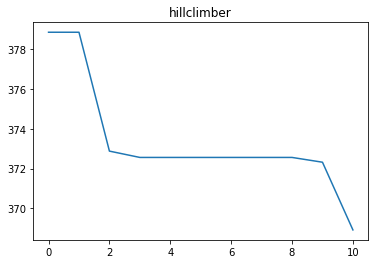

In [6]:
hillclimber_df_N, best_solution_N = random_start_hillclimber(joined_N, all_households_N, rel_poi_df, df_afstandn2)

In [ ]:
# Join improved solution back with the rest and calculate score
joined = joined[joined['stadsdeel'] != 'N']
joined = joined.append(best_solution_N, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

### Optimization of Nieuw-West (F)

In [ ]:
joined_F = joined[joined['stadsdeel'] == 'F']
all_households_F  = create_all_households(rel_poi_df, subsectie='F')
all_households_F = all_households_F.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

In [ ]:
hillclimber_df_F, best_solution_F = random_start_hillclimber(joined_F, all_households_F, rel_poi_df, df_afstandn2)

In [ ]:
# Join improved solution back with the rest and calculate score
joined = joined[joined['stadsdeel'] != 'F']
joined = joined.append(best_solution_F, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

### Optimization of "Centrum"

In [ ]:
joined_C = joined[joined['stadsdeel'].isin(['M', 'A', 'K', 'E'])]
all_households_C = create_all_households(rel_poi_df, subsectie = ['M', 'A', 'K', 'E'])
all_households_C = all_households_C.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

In [ ]:
hillclimber_df_C, best_solution_C = random_start_hillclimber(joined_C, all_households_C, rel_poi_df, df_afstandn2)

In [ ]:
# Join improved solution back with the rest and calculate score
joined = joined[joined['stadsdeel'].isin(['T', 'N', 'F'])]
joined = joined.append(best_solution_C, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

### Calculation of lower and upper bounds

In [ ]:
# Lower bound
joined_cluster_distance = joined.set_index('s1_afv_nodes').join(df_afstandn2.set_index('van_s1_afv_nodes')).reset_index().rename(columns={'index': 'van_s1_afv_nodes'})
joined_cluster_distance = joined_cluster_distance.sort_values(by='afstand')
pivot = joined_cluster_distance.groupby('naar_s1_afv_nodes').first()
lower_bound = (pivot['afstand'] * pivot['count']).sum() / pivot['count'].sum()
lower_bound

### Conclusion
Preliminary results show that 